# Coding Exercise
This notebook **is the deliverable** for your coding exercises. Below you will find the text of the exercise and the space to write your code. Feel free to **add additional code cells** if needed. 

## Completion Instructions
1. You are allowed to add additional **cells**. 
1. Unless specified otherwise, you can use as many **intermediate steps** as you want to get to the final result of each point. We will only mark the final result.
1. Some exercises will ask you to perform a calculation and assign the result to a variable with a **specific name**. Assigning the result to a variable with the wrong name will result in **0 marks** for that point.
1. Some exercises will ask you to perform a calculation and assign the result to a variable of a **specific type** (number, Series, DataFrame, etc.). Assigning the result to a variable of the wrong type will result in **0 marks** for that point. You can check the type of an object with the function **[`type()`](https://www.codingem.com/type-of-in-python/)**.
1. The **final result** of each point should be **shown on screen**. For example if you are asked to assign the result of a calculation to a number called `Total`, this number should be visible on screen. If the result is a DataFrame or Series you should show only a few rows with **[`df.head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)** or, if more appropriate, **[`df.tail()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html)**. If a final result is not shown on screen, it will lead to **0 marks** for that point.
1. You should not "hard-code" numbers into your calculations if this can be avoided. For example if you need to use the "number of columns" in a DataFrame in a calculation, you should use a command/function to calculate the number of columns and not simply count the columns and use `7` (a hard-coded number) in your calculations. Using hard-coded numbers when this is unnecessary may result in **0 marks** for that point. 


## Submission Instructions
1. Do not change the **name of the file**. Canvas will automatically add your name and student ID to the file.
1. Before submitting the notebook please **check that it runs properly** from top to bottom. To do this, save the file, close it, than re-open it and press the fast-forward button at the top of the notebook or _Restart and Run All Cells_ from the _Kernel_ menu. You can see a discussion of this in this [video](https://youtu.be/P0NyuTGddPo). If your file has a breaking error that does not allow to run the notebook from top to bottom you will receive a **penalty of 5 marks**.


## Academic Integrity
For this class exercise you are allowed to:
1. Look at any **Jupyter Notebook** used in the subject.
2. Use **AI coding assistants** such as ChatGPT. You are still responsible for understanding the code submitted and may be asked to answer questions about their code in a **short oral assessment** upon request of the subject coordinator.

This is an **individual assessment**, so you are NOT allowed to communicate with other students or any other third party during the exercise. 
___

#### Identification
Please enter your **name** and your **student ID** number in this markdown cell:

* **Student Name:** Charles Fawcett
* **Student ID:** 14247617

Missing name or ID will result in **1 mark penalty**.

___
#### Import Statements
Add in the following cell all the import statements that you need to run the entire notebook. Import statements anywhere else in the notebook will result in a **penalty of 1 mark**.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar


___
### Part 1
The file `Price_Return.csv` contains data on the price return (`Ret`) of the US stock market between 1980 and 2024 and the file `Dividend_Yield.csv` contains the dividend yield (`Div`) of the same markret over the same time period.

For your information the "price return" is the portion of the market return that comes from the change in prices of the stocks, while the "dividend yield" is the part of the return that comes from the dividends paid by the stocks. 

Load these two file into two separate DataFrames, choose the appropriate index for each, and then join these DataFrames together creating a new DataFram called `market_returns`. **[Point 1: 1 Mark]**.

In [46]:
price_return = pd.read_csv('Price_Return.csv', parse_dates=['Date']).set_index('Date')
divident_yield = pd.read_csv('Dividend_Yield.csv', parse_dates=['Date']).set_index('Date')
market_returns = price_return.join(divident_yield)
market_returns.tail()



/tmp/ipykernel_30804/1286220167.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  price_return = pd.read_csv('Price_Return.csv', parse_dates=['Date']).set_index('Date')
/tmp/ipykernel_30804/1286220167.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  divident_yield = pd.read_csv('Dividend_Yield.csv', parse_dates=['Date']).set_index('Date')


,Ret,Div
Date,,
2024-08-30,0.020203,0.001369
2024-09-30,0.019485,0.001484
2024-10-31,-0.009139,0.000841
2024-11-29,0.063463,0.001392
2024-12-31,-0.033469,0.001887


We want to investigate how the average price return and average dividend yield within each calendar month varies. To do so, extract the month (as an Integer) from the index of your combined DataFrame and create a new column called `Month`. **[Point 2: 1 Mark]**:

In [47]:
market_returns = market_returns.reset_index()
market_returns['Month'] = market_returns['Date'].dt.month
market_returns = market_returns.set_index('Date')
market_returns.head()


,Ret,Div,Month
Date,,,
1980-01-31,0.063303,0.002304,1
1980-02-29,-0.005740,0.006755,2
1980-03-31,-0.123258,0.003034,3
1980-04-30,0.049833,0.002454,4
1980-05-30,0.052629,0.007461,5


Once you have done this, compute the (annualized) average price return and (annualized) average dividend yield within each month (Jan, Feb, etc.) and plot the results using a bar chart with the following features **[Point 3: 1 Mark]**:
* Size of 10x6
* Title "Market Price Returns and Dividend Yields by Calendar Month"
* Horizontal axis label: "Month"
* Vertical axis label: "Average Return/Yield"
* A visible grid

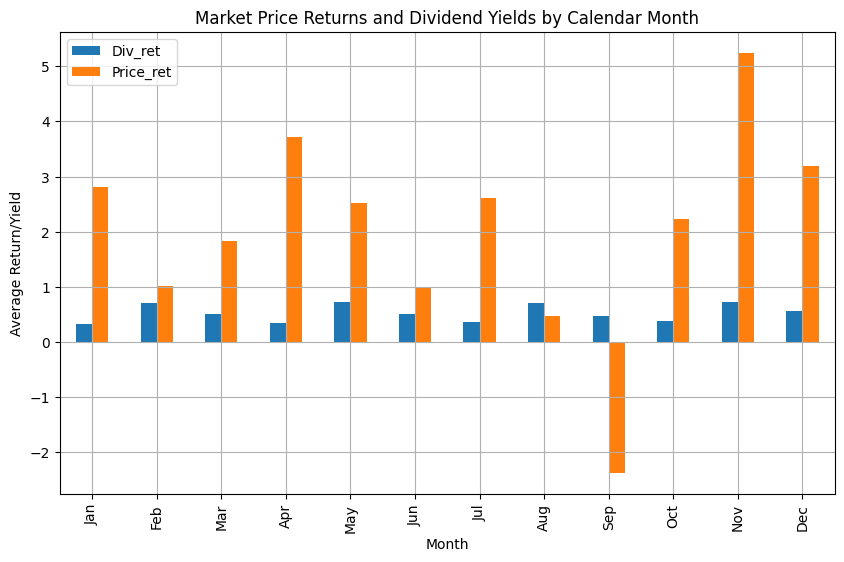

In [48]:
trading_days_in_year = 252
market_returns['Ret'] = market_returns['Ret']*trading_days_in_year
market_returns['Div'] = market_returns['Div']*trading_days_in_year

month_ret = market_returns.groupby('Month')['Ret'].mean().to_frame()
month_ret = month_ret.rename(columns={'Ret': 'Price_ret'})
month_ret['Div_ret'] = market_returns.groupby('Month')['Div'].mean().to_frame()

month_ret.index = month_ret.index.map(lambda m: calendar.month_abbr[m])
month_ret[['Div_ret', 'Price_ret']].plot(kind="bar", figsize=(10,6))
plt.title("Market Price Returns and Dividend Yields by Calendar Month")
plt.ylabel("Average Return/Yield")
plt.xlabel("Month")
plt.grid()

plt.show()

# plt.bar(month_ret['Month'], month_ret['Div_ret_annual', 'Price_ret_annual'])


# annualised_ret_price = (1+month_ret_price)^(1/days_in_month)-1

# print(annualised_ret_price)

___
### Part 2
The file `Stock_Gold.csv` contains monthly log returns for the ASX 200 index (`ASX200_ret`) and the price of gold (`gold_ret`) from Jan 1980 to Dec 2024. It is often said that Gold is a great diversifier for equity portfolios and so to investigate this, load in this data and choose the appropriate index. Next, compute the (Pearson) correlation between the two return series, saving the value to an object called `SG_corr` **[Point 4: 1 Mark]**.

In [49]:
stock_gold = pd.read_csv('Stock_Gold.csv', parse_dates=['Date'])

# stock_gold.head()
correlation_matrix = stock_gold[['ASX200_ret', 'gold_ret']].corr()

# print(correlation_matrix)

SG_corr = correlation_matrix.iloc[0,1]
print(f"SG_corr = {SG_corr}")


SG_corr = 0.02032710331341602


/tmp/ipykernel_30804/3038454081.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  stock_gold = pd.read_csv('Stock_Gold.csv', parse_dates=['Date'])


If you have done this correctly the correlation should be low, suggesting that gold has potential to diversify the risk in equity investments. To investigate this further, add a new column to your existing DataFrame representing the return on a portfolio that combines the two assets (ASX200 and Gold) in equal proportions. Specifically, construct a 50/50 Stock/Gold portfolio (a simple average of the two returns) and label this new columns `50/50`. 

Once you have done this, plot the value over time of an initial investment of $1 of each of the three assets (all equity, all gold, and the 50/50 portfolio). The plot should have the following features **[Point 5: 1 Mark]**:
* Size of 10x6
* Logarithmic scale for the vertical axis
* Horizontal Axis Label: "Date"
* Vertical Axis Label: "Total Wealth (Log Scale)"
* A visible grid
* The code should show the plot on screen but also save the plot as an image file called "SG_wealth.png"

**ATTENTION:** you will not be able to upload the plot file with your assignment. Do not worry, we will mark the code that generates the plot and the file.

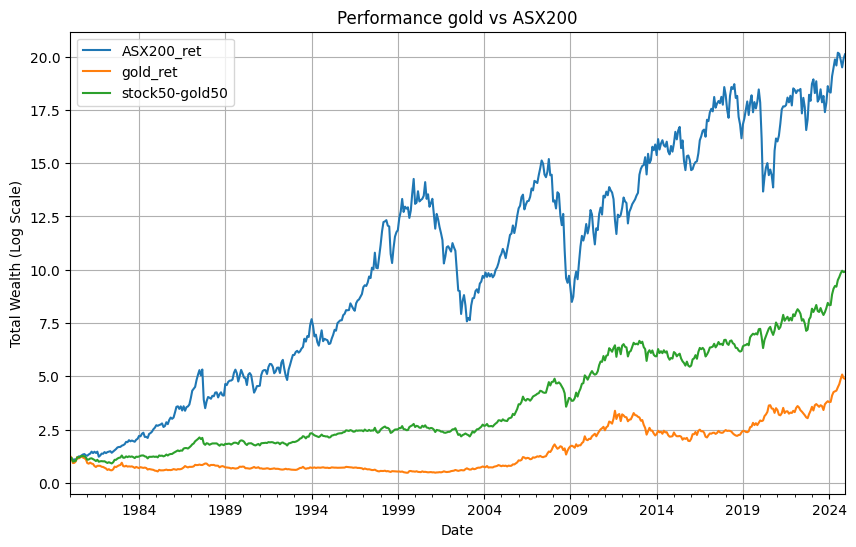

In [50]:
stock_gold['stock50-gold50'] = stock_gold['ASX200_ret']*0.5 + stock_gold['gold_ret']*0.5
stock_gold = stock_gold.set_index('Date')
performance = stock_gold[['ASX200_ret', 'gold_ret', 'stock50-gold50']].dropna().cumsum().apply(np.exp)
my_plot = performance.plot(figsize=(10, 6),
                 title = 'Performance gold vs ASX200', 
                 ylabel = 'Total Wealth (Log Scale)',
                 xlabel='Date',
                 grid=True)

my_plot.get_figure().savefig('SG_wealth.png')

The main benefit of diversification will come when considering the _risk-return trade-off_ of your portfolio, so to see if the 50/50 portfolio has helped reduced risk through diversification, compute the (annualized) standard deviation of the returns on the 50/50 portfolio, defining this as `port_std`. Then compute the average of the individual (annualized) standard deviations of the index and gold (i.e., compute the standard deviation of the index, then the standard deviation of gold, and compute the average of these two values; don't forget to annualize). Save this value as `ave_std`. Finally, compute the ratio of `port_std` to `ave_std`. Should this number be lower or higher for a more diversified portfolio? **[Point 6: 1 Mark]**:

In [51]:
port_std = stock_gold[['stock50-gold50']].std()*np.sqrt(trading_days_in_year)
print(f"port_std: {port_std}")

index_std = stock_gold[['ASX200_ret']].std()*np.sqrt(trading_days_in_year)

print(f"index_std: {index_std}")

gold_std = stock_gold[['gold_ret']].std()*np.sqrt(trading_days_in_year)

print(f"gold_std: {gold_std}")

ave_std = (index_std.iloc[0] + gold_std.iloc[0]) / 2
print(f"ave_std: {ave_std}")

ratio = port_std/ave_std

print(f"ratio of port_std to ave_std: {ratio}")


port_std: stock50-gold50    0.526592
dtype: float64
index_std: ASX200_ret    0.695284
dtype: float64
gold_std: gold_ret    0.777055
dtype: float64
ave_std: 0.7361694224873887
ratio of port_std to ave_std: stock50-gold50    0.715314
dtype: float64


ANSWER: 
The ratio of 0.71 shows that the portfolio has lower standard deviation than the average standard deviation between the gold and asx200. Which shows the effect of reducing risk using diversification.

*[Black Belt Question]*
Finally, I want you to answer the question as to whether a 50/50 portfolio is best. Perhaps a 25/75 portfolio, or a 30/70, or a ... etc., works better at reducing the risk of the combined portfolio. Can you write some code to investigate this and ultimately answer the question _What is the optimal combination of the index and gold?_ **[Point 7: 1 Mark]**.

**ATTENTION:** this is a black belt question and so is designed to be difficult. I would suggest that you only work on this after completing all the other points.

In [52]:
def calculate_std(df, perc_gold):
    df['gold-asx'] = df["gold_ret"]*perc_gold + df["ASX200_ret"]*(1-perc_gold)
    return df['gold-asx'].std()*np.sqrt(trading_days_in_year)


stock_gold_black_belt = pd.read_csv('Stock_Gold.csv', parse_dates=['Date'])

min_ratio = 100
percentage_gold_min = 0
for i in range(0, 101):
    ratio = calculate_std(stock_gold_black_belt, i/100)/ave_std
    if(ratio < min_ratio):
        min_ratio = ratio
        percentage_gold_min = i
    
print(f"optimal percentage of gold: {percentage_gold_min}% and percentage of asx200: {100-percentage_gold_min}%")

optimal percentage of gold: 44% and percentage of asx200: 56%


/tmp/ipykernel_30804/2066114266.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  stock_gold_black_belt = pd.read_csv('Stock_Gold.csv', parse_dates=['Date'])


___
### Part 3
The file `Nickel.csv` contains data on the price of Nickel from July 1997 to December 2024. Load this file into a DataFrame and choose the appropriate index. We will use this DataFrame soon.

In [53]:
nickel = pd.read_csv('Nickel.csv', parse_dates=['Date']).set_index('Date')
nickel.head()

/tmp/ipykernel_30804/1588459712.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  nickel = pd.read_csv('Nickel.csv', parse_dates=['Date']).set_index('Date')


,Price
Date,
1997-07-31,7353.0
1997-08-29,6716.0
1997-09-30,6792.0
1997-10-31,6257.0
1997-11-28,6092.0


Define a function called `momentum` that takes in a price series (indexed by date) and computes a momentum signal, defined as `1` if the return over the last `n` months was positive and `-1` if this return was negative (and `0` if the price has not changed). The default value of `n` should be set to `3`. The output of the function should also be a series (indexed by date) without any `NaN` values **[Point 8: 1 Mark]**. 

In [ ]:
def momentum(prices, n=3):
    past_ret = np.log(prices / prices.shift(n))
    signal = np.where(past_ret > 0, 1, -1)
    signal_series = pd.Series(signal, index=prices.index).dropna()
    return signal_series

Use your `momentum` function to compute the momentum signal values for the Nickel price data loaded in earlier. The output should be printed to screen as a `Series` with the name `3-month momentum`. Use this data to compute the percentage of months over the entire period for which the signal says a short position (`-1`) should be held **[Point 9: 1 Mark]**.

In [55]:
prices = nickel['Price']
n = 3

momentum_series = momentum(prices, n)
momentum_series.name = '3-month momentum'
print(momentum_series)

Date
1997-07-31   -1
1997-08-29   -1
1997-09-30   -1
1997-10-31   -1
1997-11-28   -1
             ..
2024-08-30   -1
2024-09-30    1
2024-10-31   -1
2024-11-29   -1
2024-12-31   -1
Name: 3-month momentum, Length: 330, dtype: int64


Finally, write a `for` loop to compute the percentage of short positions (computed in Point 9) for all values of `n` from 1 to 12. Which look-back period would lead to the least frequent shortselling? **[Point 10: 1 Mark]**. 

In [56]:
prices = nickel['Price']
minimum_short = 10000
for i in range(1, 13):
    signal_series = momentum(prices, i)
    neg_count = (signal_series == 1).sum()
    pos_count = (signal_series == -1).sum()
    print(f"for {i} periods look back, negative signals: {neg_count}, positive signals: {pos_count}")
    if(neg_count < minimum_short):
        minimum_short = neg_count

print(f"minimum number of short positions = {minimum_short}")

for 1 periods look back, negative signals: 167, positive signals: 163
for 2 periods look back, negative signals: 164, positive signals: 166
for 3 periods look back, negative signals: 165, positive signals: 165
for 4 periods look back, negative signals: 163, positive signals: 167
for 5 periods look back, negative signals: 168, positive signals: 162
for 6 periods look back, negative signals: 171, positive signals: 159
for 7 periods look back, negative signals: 175, positive signals: 155
for 8 periods look back, negative signals: 173, positive signals: 157
for 9 periods look back, negative signals: 170, positive signals: 160
for 10 periods look back, negative signals: 170, positive signals: 160
for 11 periods look back, negative signals: 166, positive signals: 164
for 12 periods look back, negative signals: 165, positive signals: 165
minimum number of short positions = 163
